## test_d22.ipynb
Test functions contained in d22a.py.

Author: Benjamin S. Grandey, 2023.

In [1]:
import d22a
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Watermark, including versions of dependencies
print(d22a.get_watermark())

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

matplotlib : 3.7.1
numpy      : 1.25.0
pandas     : 2.0.3
scipy      : 1.11.1
seaborn    : not installed
statsmodels: 0.14.0
xarray     : 2023.6.0

conda environment: d22a-mcdc

Compiler    : Clang 15.0.7 
OS          : Darwin
Release     : 22.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



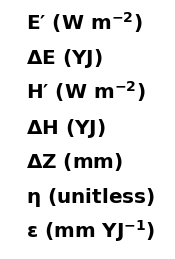

In [4]:
# Test rendering of variable symbols and units
fig, ax = plt.subplots(figsize=(2, 3))
ax.axis('off')
for v, var in enumerate(d22a.SYMBOLS_DICT.keys()):
    var_sym = d22a.SYMBOLS_DICT[var]
    units = d22a.UNITS_DICT[var]
    ax.text(0.1, 0.95-(0.15*v), f'{var_sym} ({units})', fontsize='x-large', fontweight='bold')

In [5]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2023-07-05 17:21:21
End:       2023-07-05 17:21:21
Wall time: 0 s
